# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output

In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE
import torch
device = torch.device("cuda:3")

In [3]:
dataset = DataLoader(data_dir="/scratch/guskhala/DDICorpus/DDICorpus/", device=device)

Initializing...
Processing Train data...
Processing Val data...
Processing Test data...
Done!


In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-DrugBank.d535.s0,1762,0.0,6.0,Train
1,DDI-DrugBank.d535.s0,1089,7.0,18.0,Train
2,DDI-DrugBank.d535.s0,131,19.0,24.0,Train
3,DDI-DrugBank.d535.s0,1773,25.0,32.0,Train
4,DDI-DrugBank.d535.s0,64,33.0,37.0,Train


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-DrugBank.d535.s0,1,80.0,90.0
1,DDI-DrugBank.d535.s1,4,0.0,20.0
2,DDI-DrugBank.d535.s1,4,55.0,80.0
3,DDI-DrugBank.d535.s1,1,147.0,157.0
4,DDI-DrugBank.d535.s1,4,189.0,213.0


In [6]:
dataset.vocab[:15]

['<unk>',
 '<pad>',
 ',',
 'of',
 '.',
 'the',
 'and',
 'in',
 'with',
 'to',
 ')',
 '(',
 'a',
 'be',
 'is']

In [7]:
dataset.id2ner

{0: 'NEG', 1: 'drug', 2: 'drug_n', 3: 'brand', 4: 'group'}

In [8]:
dataset.max_sample_length

132

In [9]:
dataset.get_random_sample()

/home/guskhala@GU.GU.SE/lt2316-h20/lt2316-h20-aa/aa/data_loading.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'DRUG:Phenytoin : In post-marketing experience , there have been reports of both increases and decreases in DRUG:phenytoin levels with DRUG:dexamethasone co-administration , leading to alterations in seizure control .'

### Data Exploration

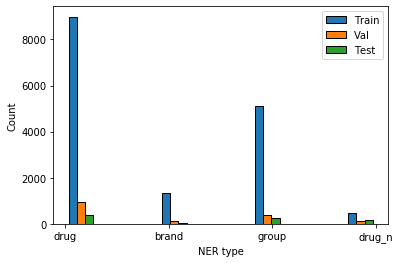

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [12]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        pos_tags=dataset.pos_tags,
                                                        vocab=dataset.vocab,
                                                        device=device
                                                       ))

torch.Size([6270, 132, 204])
torch.Size([635, 132, 204])
torch.Size([665, 132, 204])


## Bonus Part: Explore Some more

In [13]:
#uncomment the code below if you want to do bonus part

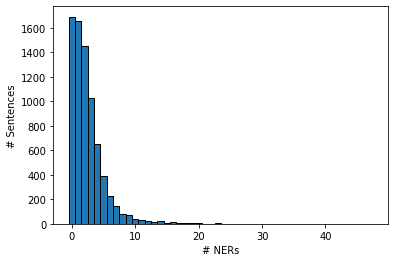

In [14]:
dataset.plot_ner_per_sample_distribution()

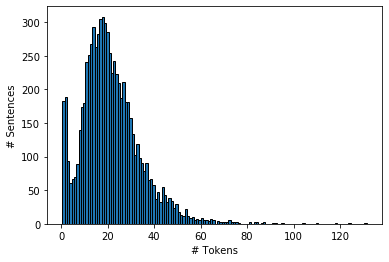

In [15]:
dataset.plot_sample_length_distribution()

In [16]:
#dataset.plot_ner_cooccurence_venndiagram()